# Exploratory analysis on 2019 players scouts

It uses cartoleiro class that impements all the reading from API and consolidation of season data.

From begining, it initializes cartoleiro class to a cart object and show the columns from scout_table.

In [113]:
import cartoleiro

cart = cartoleiro.Cartoleiro(True)
cart.scout_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14847 entries, 0 to 14846
Data columns (total 29 columns):
rodada_id       14847 non-null int64
atleta_id       14847 non-null int64
A               1870 non-null float64
CA              4276 non-null float64
CV              368 non-null float64
DD              612 non-null float64
DP              84 non-null float64
FC              7424 non-null float64
FD              4586 non-null float64
FF              5557 non-null float64
FS              7517 non-null float64
FT              848 non-null float64
G               2340 non-null float64
GC              92 non-null float64
GS              621 non-null float64
I               2192 non-null float64
PE              8120 non-null float64
PP              133 non-null float64
RB              7110 non-null float64
SG              2299 non-null float64
apelido         14847 non-null object
clube_id        14847 non-null int64
jogos_num       14847 non-null int64
media_num       14847 non-null

In [114]:
cart.rounds_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 35 columns):
Unnamed: 0                                        190 non-null int64
Unnamed: 0.1                                      180 non-null float64
Unnamed: 0.1.1                                    170 non-null float64
Unnamed: 0.1.1.1                                  160 non-null float64
Unnamed: 0.1.1.1.1                                150 non-null float64
Unnamed: 0.1.1.1.1.1                              140 non-null float64
Unnamed: 0.1.1.1.1.1.1                            130 non-null float64
Unnamed: 0.1.1.1.1.1.1.1                          120 non-null float64
Unnamed: 0.1.1.1.1.1.1.1.1                        110 non-null float64
Unnamed: 0.1.1.1.1.1.1.1.1.1                      100 non-null float64
Unnamed: 0.1.1.1.1.1.1.1.1.1.1                    90 non-null float64
Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1                  80 non-null float64
Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1             

In [115]:
teams = cart.read_teams()
teams = teams.set_index("id")
teams[["abreviacao", "nome"]]

,abreviacao,nome
id,,
262,FLA,Flamengo
263,BOT,Botafogo
264,COR,Corinthians
265,BAH,Bahia
266,FLU,Fluminense
267,VAS,Vasco
275,PAL,Palmeiras
276,SAO,São Paulo
277,SAN,Santos


In [116]:
import pandas as pd

atletas_temp = cart.scout_table[["rodada_id", "atleta_id", "clube_id", "apelido", "posicao_id", "pontos_num", 
                                 "jogos_num"]]
lista = atletas_temp.set_index(["atleta_id", "rodada_id"])
atletas = pd.DataFrame()
for atleta in lista.index.get_level_values(0).unique():
    # .copy(deep=True) to supress SettingWithCopyWarning
    df = atletas_temp[atletas_temp.atleta_id == atleta].copy(deep=True) 
    # test to flag the player who plays in a specific round
    df["jogou"] = (df["jogos_num"].diff() != 0) & (df["jogos_num"] != 0)
    atletas = pd.concat([atletas, df], axis=0)
# discard rows where player didnt play the match
atletas = atletas[atletas.jogou]

atletas[["pontos_num"]].agg(["count","mean", "std", "min", "median", "max"])

,pontos_num
count,5512.000000
mean,2.990388
std,4.117110
min,-9.300000
median,2.100000
max,37.700000


<IPython.core.display.Javascript object>


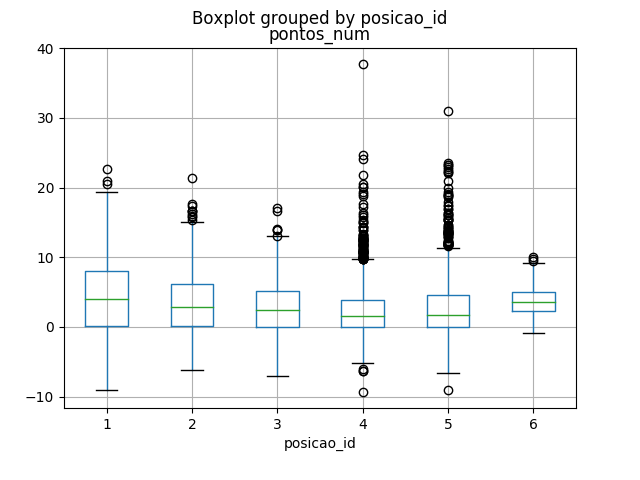

In [117]:
%matplotlib notebook

atletas.boxplot(column="pontos_num", by="posicao_id")
# atletas.hist(column="pontos_num", by="posicao_id", bins=25, alpha=0.5, layout=(6,1), sharex=True)

In [118]:
atletas.groupby("posicao_id")["pontos_num"].agg(["count","mean", "std", "min", "median", "max"])

,count,mean,std,min,median,max
posicao_id,,,,,,
1,374,4.323529,5.744384,-9.00,4.00,22.70
2,780,3.433718,4.327671,-6.20,2.85,21.40
3,782,2.861381,3.661355,-7.00,2.40,17.10
4,1907,2.436497,3.723953,-9.30,1.50,37.70
5,1308,3.014526,4.509748,-9.00,1.70,31.00
6,361,3.769307,1.970357,-0.92,3.61,10.02


In [119]:
atletas.groupby("rodada_id")["pontos_num"].agg(["count","mean", "std", "min", "median", "max"])

,count,mean,std,min,median,max
rodada_id,,,,,,
1,284,3.027289,4.516114,-9.0,1.80,22.7
2,285,2.755579,3.900233,-6.6,2.00,21.0
3,285,3.033649,3.875692,-5.6,2.00,18.8
4,283,3.073710,3.886629,-5.7,2.10,22.1
5,285,3.090982,3.976333,-4.1,2.30,23.2
6,300,2.788133,4.072469,-9.0,2.00,22.2
7,270,3.064185,3.942631,-9.3,2.40,17.9
8,298,3.019899,4.016848,-4.9,2.20,21.8
9,298,2.914128,4.053310,-7.0,1.90,18.6


In [120]:
(atletas.groupby("clube_id")["pontos_num"].agg(["count","mean", "std", "min", "median", "max"]).
 sort_values("mean", ascending=False)).join(teams["abreviacao"])[["abreviacao","count","mean", 
                                                                  "std", "min", "median", "max"]]


,abreviacao,count,mean,std,min,median,max
clube_id,,,,,,,
262,FLA,283,4.395760,5.585123,-6.1,3.100,37.7
277,SAN,284,3.798768,4.673350,-9.0,2.850,24.1
265,BAH,284,3.541232,4.179903,-5.2,2.500,22.4
285,INT,285,3.521544,3.948107,-3.8,2.900,20.0
284,GRE,284,3.414859,4.249713,-5.5,2.250,23.3
264,COR,270,3.413704,3.933554,-5.3,2.800,20.5
275,PAL,193,3.127047,4.365088,-6.0,2.100,22.9
276,SAO,270,3.083741,4.311714,-6.6,2.200,23.5
282,ATL,285,3.082526,3.942823,-4.8,2.240,16.7


In [121]:
home = cart.rounds_table[["rodada_id", "clube_casa_id"]].copy(deep=True) 
home.loc[:,"home_guest"] = len(home)*["H"]
new_atletas = atletas.merge(home, how="left", left_on=["rodada_id", "clube_id"], 
                            right_on=["rodada_id", "clube_casa_id"])
new_atletas["home_guest"] = new_atletas["home_guest"].fillna("G")
new_atletas.groupby("home_guest")["pontos_num"].agg(["count","mean", "std", "min", "median", "max"])

,count,mean,std,min,median,max
home_guest,,,,,,
G,2764,2.563448,3.905517,-9.3,1.8,23.3
H,2748,3.419814,4.277419,-7.0,2.5,37.7


<IPython.core.display.Javascript object>


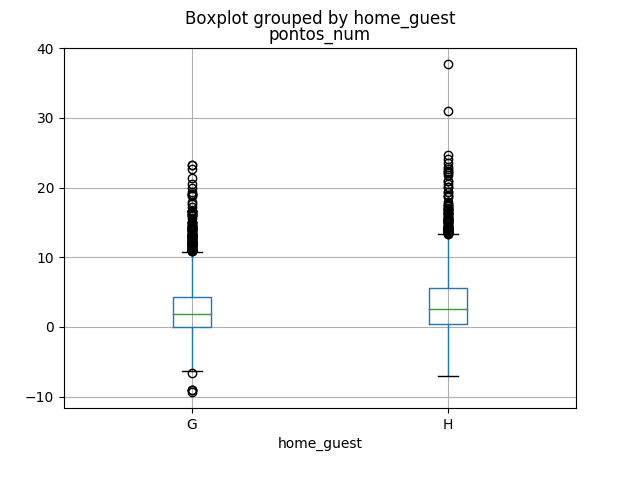

In [122]:
import matplotlib.pyplot as plt

#new_atletas.hist(column="pontos_num", by="home_guest", ax=ax, sharex=True, sharey=True, bins=50, alpha=0.5)
new_atletas.boxplot(column="pontos_num", by="home_guest")

In [123]:
new_atletas.groupby(["posicao_id", "home_guest"])["pontos_num"].agg(["count","mean", "std", "min", "median", "max"])

count      mean       std   min  median    max
posicao_id home_guest                                                
1          G             188  4.416489  6.157722 -9.00   4.000  22.70
           H             186  4.229570  5.309037 -6.60   4.450  21.00
2          G             398  2.997236  4.273640 -5.80   2.250  21.40
           H             382  3.888482  4.342323 -6.20   3.500  17.40
3          G             398  2.302764  3.626153 -6.00   1.500  16.70
           H             384  3.440365  3.611934 -7.00   3.050  17.10
4          G             948  2.131118  3.351104 -9.30   1.500  19.10
           H             959  2.738373  4.038123 -6.30   1.700  37.70
5          G             653  2.362021  3.975284 -9.00   1.300  23.30
           H             655  3.665038  4.903171 -5.30   2.200  31.00
6          G             179  3.256816  1.847037 -0.17   2.980   9.45
           H             182  4.273352  1.962525 -0.92   4.205  10.02

In [124]:
new_atletas.groupby(["clube_id", 
                     "home_guest"])["pontos_num"].agg(["count", "mean", "std", "min", "median", 
                                                       "max"])

count      mean       std  min  median   max
clube_id home_guest                                              
262      G             150  3.995067  4.878328 -6.1   2.600  19.0
         H             133  4.847669  6.276118 -3.8   3.500  37.7
263      G             150  2.731600  3.823234 -3.6   1.550  14.9
         H             134  2.482985  4.131971 -6.6   1.515  19.4
264      G             135  2.903407  4.039226 -5.3   2.300  20.5
         H             135  3.924000  3.771090 -4.1   3.500  15.8
265      G             134  3.646418  4.244195 -5.2   2.750  19.1
         H             150  3.447267  4.133590 -5.0   2.300  22.4
266      G             119  2.260672  4.527351 -9.3   1.700  19.4
         H             146  2.629863  3.581804 -5.3   2.200  18.9
267      G             134  1.863134  3.639529 -5.7   1.400  12.5
         H             150  2.882867  3.600434 -4.6   2.200  14.0
275      G             119  2.545966  3.987404 -6.0   1.800  14.4
         H              74  4.061486  4.793606 -5.0   3.100  22.9
276      G             120  2.110250  3.920312 -6.6   1.100  21.4
         H             150  3.862533  4.462637 -4.1   3.150  23.5
277      G             150  2.939667  3.860237 -9.0   2.200  15.7
         H             134  4.760448  5.292801 -3.3   3.550  24.1
282      G             135  2.672370  3.553994 -4.8   2.100  16.7
         H             150  3.451667  4.240531 -4.0   2.550  15.8
283      G             148  1.809257  3.441526 -5.1   1.000  12.5
         H             135  3.398000  4.107617 -3.9   2.100  21.0
284      G             149  2.708188  3.783979 -4.0   1.930  23.3
         H             135  4.194815  4.599908 -5.5   3.100  17.0
285      G             135  2.459037  3.370014 -3.8   2.400  20.0
         H             150  4.477800  4.189680 -2.9   4.000  18.6
290      G             134  2.553433  4.073395 -9.0   1.650  16.7
         H             135  3.043185  4.106196 -7.0   2.500  17.1
293      G             150  2.562133  4.225248 -5.5   1.630  17.7
         H             120  3.600000  4.097201 -4.0   3.300  18.8
314      G             150  2.633533  3.695671 -4.1   1.850  22.7
         H             135  2.123778  3.198677 -6.3   2.060  11.9
315      G             134  2.356194  3.832763 -6.3   1.700  17.2
         H             148  3.128581  3.738581 -5.5   2.650  17.0
341      G             135  1.754296  3.091867 -6.0   1.200  12.2
         H             149  2.644161  3.610788 -4.0   1.800  15.0
354      G             135  2.082741  3.424905 -5.0   1.700  19.1
         H             150  3.429133  4.316743 -3.3   2.465  24.7
356      G             148  2.437095  3.800936 -4.8   1.700  23.2
         H             135  2.398296  3.660762 -5.5   1.400  17.4

In [125]:
most_pointers = new_atletas[(new_atletas.pontos_num > 15)]
most_pointers = pd.concat([most_pointers.groupby(["posicao_id"])["pontos_num"].agg(["count"]),
                          atletas.groupby("posicao_id")["pontos_num"].agg(["count"])], axis=1)

most_pointers.columns.values[1] = "total"
most_pointers["proportion"] = most_pointers["count"] / most_pointers["total"]
most_pointers

,count,total,proportion
posicao_id,,,
1,13.0,374,0.034759
2,10.0,780,0.012821
3,2.0,782,0.002558
4,17.0,1907,0.008915
5,33.0,1308,0.025229
6,NaN,361,NaN


In [126]:
new_atletas[(new_atletas.pontos_num < -1)].sort_values("pontos_num", ascending=False).tail(20)

,rodada_id,atleta_id,clube_id,apelido,posicao_id,pontos_num,jogos_num,jogou,clube_casa_id,home_guest
3726,15,78248,277,Gustavo Henrique,3,-5.5,13,True,NaN,G
522,6,69012,293,Santos,1,-5.5,5,True,NaN,G
2249,3,63082,266,Rodolfo,1,-5.6,3,True,NaN,G
4555,4,84382,267,Danilo Barcelos,2,-5.7,3,True,NaN,G
5435,17,90118,290,Yago Rocha,2,-5.8,4,True,NaN,G
5120,17,71631,275,Weverton,1,-6.0,11,True,NaN,G
2687,11,97528,266,Frazan,3,-6.0,3,True,NaN,G
3554,1,69010,341,João Carlos,1,-6.0,1,True,NaN,G
2185,11,85300,262,Berrío,5,-6.1,7,True,NaN,G
1457,13,42208,314,André Moritz,4,-6.1,4,True,314.0,H
